<img src='filmes_natal.jpg'>

# Problema


Obter uma lista de filmes sobre o tema Natal no site iMDb e, para cada filme, as seguintes informações:

* Título
* link iMDb com mais informações sobre o filme
* Sinopse
* Diretor
* Gênero
* País
* Idioma
* Tempo de duração em minutos
* Atores principais
* Score
* Ano
* Quantidade de reviews de usuários iMDb

Antes de atacarmos esse problema, precisamos entender algumas coisas básicas.

# Componentes de uma página web

Quando visitamos uma página, nosso navegador faz uma solicitação à um servidor de Internet. Essa solicitação é chamada de solicitação GET, pois estamos recebendo arquivos do servidor. O servidor então envia arquivos que dizem ao navegador como renderizar a página para nós. Os arquivos se enquadram em alguns tipos principais:

* HTML: Contém o conteúdo principal da página;
* CSS: Adiciona estilos para que a página fique mais bonita;
* JS: Arquivos JavaScript adicionam interatividade à página;
* Imagens: formatos de imagem, tais como JPG e PNG permitem que páginas web exibam imagens.

Após nosso navegador receber todos os arquivos, ele renderiza a página e a exibe para nós. Existem muitas coisas que acontecem no background para renderizar bem uma página, mas não precisamos nos preocupar com a maioria delas quando estamos realizando o web scraping. Quando realizamos o web scraping, estamos interessados no conteúdo principal da página, então olharemos para o HTML.

# Entendendo HTML

HyperText Markup Language (HTML) é uma linguagem com que as páginas web são criadas. O HTML não é uma linguagem de programação, como o Python – em vez disso, é uma linguagem de marcação que diz ao navegador como exibir o conteúdo. O HTML permite que você faça coisas similares ao Microsoft Word – criar parágrafos, deixar textos em negrito etc. Por não ser uma linguagem de programação, o HTML nem se aproxima da complexidade do Python.

O HTML é formado por elementos chamados tags. Veja uma exemplo de código em HTML:

```HTML
<html>
    <head>
    </head>
    <body>
        <p>
            Aqui um exemplo de parágrafo com texto.
            <a href="https://www.dataquest.io">Learn Data Science Online</a>
        </p>
        <p>
            Aqui um segundo exemplo de parágrafo com texto.
            <a href="https://www.python.org">Python</a>
        </p>
    </body>
</html>
```

No exemplo acima, temos duas tags a. As tags a são links, e dizem ao navegador para renderizar uma outra página. A propriedade href determina para onde o link vai. As tags a e p são extremamente comuns, a seguir temos outras:

* div – indica uma divisão, uma área na página;
* b – deixa qualquer texto dentro dela em negrito;
* i – deixa em itálico;
* table – cria uma tabela;
* form – cria um formulário;

Para uma lista completa de tags, clique [aqui](https://developer.mozilla.org/pt-BR/docs/Web/HTML/HTML5/HTML5_element_list).

# A biblioteca requests

A primeira coisa que precisamos fazer para realizar o web scrap é baixar a página. Podemos baixar as páginas utilizando a biblioteca requests do Python. A biblioteca requests fará uma solicitação GET ao servidor, que fará o download dos conteúdos HTML da página solicitada para nós. Existem vários tipos de solicitação diferentes que podemos realizar utilizando a biblioteca requests – GET é apenas um deles.

# A Biblioteca BeautifulSoup

Depois de baixamos um documento HTML da página que desejamos usando o requests. Nós podemos utilizar a biblioteca BeautifulSoup para analisar esse documento e extrair o conteúdo das tags que desejamos.

# Importando as Bibliotecas

In [1]:
import requests # para se conectar a página web
from bs4 import BeautifulSoup # para extrair informações do html
import pandas as pd # para manusear os dados e salvá-los em csv 

# Obtendo os títulos e links dos Filmes

In [4]:
# url que lista filmes sobre o tema natal 
url_fonte = 'http://www.imdb.com/find?q=Christmas&s=tt&ref_=fn_tt'

In [5]:
# obtendo conteúdo da página
con = requests.get(url_fonte)

In [6]:
# criando objeto BeautifulSoup 
soup = BeautifulSoup(con.content, "html.parser")

In [7]:
titulos_filmes = [div.find('a').contents[0] for div in soup.findAll('td', attrs={'class':'result_text'})]

In [8]:
links_filmes = ['http://www.imdb.com' + div.a['href'] for div in soup.findAll('td', attrs={'class':'result_text'})]

# Criando as funções para o scraping

### Sinopse

In [16]:
url_filme = 'http://www.imdb.com/title/tt0144827/?ref_=fn_tt_tt_3'

In [17]:
# obtendo conteúdo da página
con = requests.get(url_filme)

# criando objeto BeautifulSoup 
soup = BeautifulSoup(con.content, "html.parser")

In [18]:
# <div class="summary_text" itemprop="description">
sinopse =  soup.find('div', attrs={'class':'summary_text'})

In [19]:
print sinopse.text        


                    A present-day adaptation of Charles Dickens' "A Christmas Carol".
            


In [26]:
# Fazendo função que irá capturar essa informação para nós

def get_sinopse(soup):
    '''
    Função rebe um objeto BeautifulSoup
    chamado soup com o html da página do filme
    desejado e retorna uma string da sinopse do filme.
    Caso não haja uma sinopse, retorna None.
    '''
    sinopse =  soup.find('div', attrs={'class':'summary_text'})
    
    if sinopse.text:
        return sinopse.text
    else:
        return None

### Diretor

In [88]:
# <span class="itemprop" itemprop="name">Jeremiah S. Chechik</span>
diretor =  soup.find('span', attrs={'class':'itemprop'}, itemprop='name')

In [89]:
print diretor.text

Abel Ferrara


In [90]:
def get_diretor(soup):
    '''
    retorna uma lista com 
    os gêneros do filme
    '''
    diretor =  soup.find('span', attrs={'class':'itemprop'}, itemprop='name')
    if diretor.text:
        return diretor.text
    else:
        return None

### Gênero

In [225]:
# tags com as informações do Gênero dos filmes
'''
<div class="see-more inline canwrap" itemprop="genre">
            <h4 class="inline">Genres:</h4>
<a href="/genre/Comedy?ref_=tt_stry_gnr"> Comedy</a>
        </div>
'''

div =  soup.find('div', attrs={'class':'see-more inline canwrap'}, itemprop='genre')

In [226]:
generos = [a.text for a in div.find_all('a')]

In [227]:
generos

[u' Comedy', u' Crime', u' Family']

In [228]:
def get_generos(soup):
    div =  soup.find('div', attrs={'class':'see-more inline canwrap'}, itemprop='genre')
    if div != None:
        generos = [a.text for a in div.find_all('a')]
        return generos
    else:
        return None

In [229]:
get_generos(soup)

[u' Comedy', u' Crime', u' Family']

### País

In [95]:
'''
    <div class="txt-block">
    <h4 class="inline">Country:</h4>
        <a href="/search/title?country_of_origin=cl&amp;ref_=tt_dt_dt" itemprop="url">Chile</a>
              <span class="ghost">|</span>
        <a href="/search/title?country_of_origin=fr&amp;ref_=tt_dt_dt" itemprop="url">France</a>
'''


tags_paises = soup.select("a[href*=country_of_origin]")

In [96]:
# temos dois países
tags_paises

[<a href="/search/title?country_of_origin=us&amp;ref_=tt_dt_dt" itemprop="url">USA</a>,
 <a href="/search/title?country_of_origin=fr&amp;ref_=tt_dt_dt" itemprop="url">France</a>]

In [97]:
paises = [a.text for a in tags_paises]

In [98]:
paises

[u'USA', u'France']

In [99]:
def get_paises(soup):
    tags_paises = soup.select("a[href*=country_of_origin]")
    if len(tags_paises):
        paises = [a.text for a in tags_paises]
        return paises
    else:
        return None

### Idioma

In [100]:
'''
<a href="/search/title?title_type=feature&amp;primary_language=es&amp;sort=moviemeter,
asc&amp;ref_=tt_dt_dt" itemprop="url">Spanish</a>
'''

tags_idioma = soup.select("a[href*=primary_language]")

In [101]:
tags_idioma

[<a href="/search/title?title_type=feature&amp;primary_language=en&amp;sort=moviemeter,asc&amp;ref_=tt_dt_dt" itemprop="url">English</a>,
 <a href="/search/title?title_type=feature&amp;primary_language=es&amp;sort=moviemeter,asc&amp;ref_=tt_dt_dt" itemprop="url">Spanish</a>]

In [102]:
tags_idioma[0].text

u'English'

In [103]:
def get_idioma(soup):
    tags_idioma = soup.select("a[href*=primary_language]")
    if len(tags_idioma):
        return tags_idioma[0].text
    else:
        None

In [104]:
get_idioma(soup)

u'English'

### Tempo de duração em minutos

In [105]:
'''
<time itemprop="duration" datetime="PT99M">99 min</time>
'''

tempo = soup.findAll('time', itemprop="duration")

In [106]:
tempo

[<time datetime="PT85M" itemprop="duration">\n                        1h 25min\n                    </time>,
 <time datetime="PT85M" itemprop="duration">85 min</time>]

In [107]:
t = tempo[0].text

In [108]:
t

u'\n                        1h 25min\n                    '

In [109]:
t = t.replace(' ', '')

In [110]:
t

u'\n1h25min\n'

In [111]:
t = t.replace('\n', '')
t

u'1h25min'

In [112]:
t2 = t[:t.find('min')]
t2

u'1h25'

In [113]:
def transformar_horas_em_minutos(text):
    if text.find('h') != -1 and text.find('min') != -1:
        tempo = text.replace(' ', '')
        tempo = tempo.replace('\n', '')
        tempo = tempo.replace('min', '')
        h = int(tempo[0])*60
        m = int(tempo[2:])
        return h + m
    elif text.find('h') != -1 and text.find('min') == -1:
        tempo = text.replace(' ', '')
        tempo = tempo.replace('\n', '')
        return int(tempo[0])*60
    else:
        tempo = text.replace(' ', '')
        tempo = tempo.replace('\n', '')
        tempo = tempo.replace('min', '')
        return int(tempo)

In [114]:
transformar_horas_em_minutos('\n  1h 30min \n')

90

In [115]:
transformar_horas_em_minutos('\n  50min  \n')

50

In [116]:
transformar_horas_em_minutos('\n   2h00  \n')

120

In [117]:
def get_duracao(soup):
    tempo = soup.findAll('time', itemprop="duration")
    if len(tempo):
        return transformar_horas_em_minutos(tempo[0].text)   
    else:
        return None

In [118]:
get_duracao(soup)

85

### Atores Principais

In [119]:
'''
<span itemprop="actors" itemscope="" itemtype="http://schema.org/Person">
<a href="/name/nm1443757?ref_=tt_ov_st_sm" itemprop="url"><span class="itemprop" itemprop="name">Manuela Martelli</span></a>,             </span>
'''
atores = soup.findAll('span', itemprop="actors")

In [120]:
atores

[<span itemprop="actors" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0005576?ref_=tt_ov_st_sm" itemprop="url"><span class="itemprop" itemprop="name">Drea de Matteo</span></a>,             </span>,
 <span itemprop="actors" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0000969?ref_=tt_ov_st_sm" itemprop="url"><span class="itemprop" itemprop="name">Lillo Brancato</span></a>,             </span>,
 <span itemprop="actors" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0972605?ref_=tt_ov_st_sm" itemprop="url"><span class="itemprop" itemprop="name">Lisa Valens</span></a> </span>]

In [121]:
for div in atores:
    print div.a.text

Drea de Matteo
Lillo Brancato
Lisa Valens


In [122]:
def gets_atores(soup):
    divs_atores = soup.findAll('span', itemprop="actors")
    atores = [div.a.text for div in divs_atores]
    return atores

### Score

In [123]:
'''
<span itemprop="ratingValue">6,2</span>
'''

score = soup.find('span', itemprop="ratingValue")

In [124]:
float(score.text)

5.8

In [125]:
def get_score(soup):
    score = soup.find('span', itemprop="ratingValue")
    if score != None:
        return float(score.text)
    else:
        return None

### Ano

In [126]:
# <a href="/year/2009/?ref_=tt_ov_inf">2009</a>

ano = soup.select("a[href*=/year/]")

In [127]:
ano

[<a href="/year/2001/?ref_=tt_ov_inf">2001</a>]

In [128]:
ano[0].text

u'2001'

In [150]:
def get_ano(soup):
    ano = soup.select("a[href*=/year/]")
    if len(ano):
        return int(ano[0].text)
    else:
        return None

### Quantidade de reviews de usuários iMDb

In [135]:
'''
<a href="reviews?ref_=tt_ov_rt">55 user</a>
'''

reviews = soup.select("a[href*=reviews?ref_=tt_ov_rt]")

In [136]:
reviews

[<a href="criticreviews?ref_=tt_ov_rt"> <div class="metacriticScore score_mixed titleReviewBarSubItem">\n<span>55</span>\n</div></a>,
 <a href="criticreviews?ref_=tt_ov_rt">\nMetascore\n</a>,
 <a href="reviews?ref_=tt_ov_rt">20 user</a>,
 <a href="externalreviews?ref_=tt_ov_rt">36 critic</a>]

In [145]:
def get_qtdReviews(soup):
    reviews = soup.select("a[href*=reviews?ref_=tt_ov_rt]")
    if len(reviews):
        for review in reviews:
            if review.text.find('user') != -1:
                qtd_r = review.text
                return int(qtd_r[:qtd_r.find(' user')])
        
        return None
    
    else:
        return None

In [146]:
get_qtdReviews(soup)

20

# Extraindo os dados para todos os filmes

Cada filme será um dicionário do tipo:

In [147]:
filme = {'titulo': 'string','link': 'string', 'sinopse': 'string', 'diretor': 'string','genero': 'lista de string',
         'pais': 'lista de string', 'Idioma': 'lista de string','duracao': 'int', 'atores': 'lista de string',
         'score': 'float', 'ano': 'int','popularidade': 'int','qtd_reviews':'int'}

Teremos então uma lista de dicionários filmes.

In [148]:
len(titulos_filmes)

200

In [230]:
lista_filmes = []
for titulo, link in zip(titulos_filmes, links_filmes):
    dic = {}
    dic['titulo'] = titulo
    dic['link'] = link
    
    con = requests.get(link)
    soup = BeautifulSoup(con.content, "html.parser")
    con.close()
    
    dic['sinopse'] = get_sinopse(soup)
    dic['diretor'] = get_diretor(soup)
    dic['genero'] = get_generos(soup)
    dic['pais'] = get_paises(soup)
    dic['idioma'] = get_idioma(soup)
    dic['duracao'] = get_duracao(soup)
    dic['atores'] = gets_atores(soup)
    dic['score'] = get_score(soup)
    dic['ano'] = get_ano(soup)
    dic['qtd_reviews'] = get_qtdReviews(soup)
    
    lista_filmes.append(dic)

In [231]:
import json

#salvando nossos dados
with open('dados_filmes_natal', 'w') as fout:
    json.dump(lista_filmes, fout)

# Análises dos Dados

In [2]:
import ast

#fazendo o load de nossos dados 
f = open('dados_filmes_natal', 'r')
dados = f.readlines()

In [3]:
# transdormando a representação em string de uma lista
# de dicionários em uma lista de dicionário real
lista_filmes = ast.literal_eval(dados[0])

In [4]:
lista_filmes[0]

{'ano': 2001,
 'atores': ['Drea de Matteo', 'Lillo Brancato', 'Lisa Valens'],
 'diretor': 'Abel Ferrara',
 'duracao': 85,
 'genero': [' Crime', ' Drama'],
 'idioma': 'English',
 'link': 'http://www.imdb.com/title/tt0217978/?ref_=fn_tt_tt_1',
 'pais': ['USA', 'France'],
 'qtd_reviews': 20,
 'score': 5.8,
 'sinopse': '\n                    A New York drug dealer is kidnapped, and his wife must try to come up with the money and drugs to free him from his abductors before Christmas.\n            ',
 'titulo': 'Gangues do Gueto'}

### Nuvem de Palavras das sinopses

In [160]:
# criando uma só string para
# todas as sinopses
todas_sinopses = ''
for dic in lista_filmes:
    todas_sinopses += dic['sinopse']

In [161]:
f = open('sinopses.txt', 'w')
f.write(todas_sinopses.encode('utf-8'))
f.close()

<img src='wordcload_sinopses.png'>

In [162]:
# Seee full sumary???? http://www.imdb.com/title/tt7647000/

### Produção de filmes de natal ao passar dos anos

In [168]:
#criando uma lista dos anos em que cada filme foi produzido
anos  = [dic['ano'] for dic in lista_filmes if dic['ano'] != None]

In [169]:
# anos agora se torna um conjunto
# portando não há anos repetidos
anos =set(anos)

In [170]:
anos

{1938,
 1945,
 1947,
 1951,
 1954,
 1965,
 1966,
 1974,
 1980,
 1983,
 1984,
 1985,
 1986,
 1988,
 1989,
 1991,
 1992,
 1993,
 1994,
 1995,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018}

In [171]:
dic = {'1938 - 1979': 0, '1980 - 1984':0, '1985 - 1989':0, '1990 - 1994':0, '1995 - 1999':0,
      '2000 - 2004':0, '2005 - 2009':0, '2010 - 2017':0}

In [172]:
l = '1980 - 1984'.split()
l

['1980', '-', '1984']

In [173]:
l.remove('-')

In [174]:
l

['1980', '1984']

In [175]:
for chave in dic:
    for filme in lista_filmes:
        anos = chave.split()
        anos.remove('-')
        if filme['ano'] >= int(anos[0]) and filme['ano'] <= int(anos[1]):
            dic[chave] += 1

In [176]:
dic

{'1938 - 1979': 8,
 '1980 - 1984': 4,
 '1985 - 1989': 7,
 '1990 - 1994': 4,
 '1995 - 1999': 4,
 '2000 - 2004': 8,
 '2005 - 2009': 17,
 '2010 - 2017': 146}

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [178]:
df = pd.DataFrame()
df['intervalos_anos'] = dic.keys()
df['freq'] = dic.values()

In [179]:
df

,intervalos_anos,freq
0,1995 - 1999,4
1,2010 - 2017,146
2,1980 - 1984,4
3,2000 - 2004,8
4,1985 - 1989,7
5,1990 - 1994,4
6,2005 - 2009,17
7,1938 - 1979,8


In [180]:
intervalos_anos = ['1938 - 1979', '1980 - 1984', '1985 - 1989', '1990 - 1994', '1995 - 1999',
                  '2000 - 2004', '2005 - 2009', '2010 - 2017']

In [181]:
freq = [dic[chave] for chave in intervalos_anos]

In [182]:
df = pd.DataFrame()
df['intervalos_anos'] = intervalos_anos
df['freq'] = freq

df

,intervalos_anos,freq
0,1938 - 1979,8
1,1980 - 1984,4
2,1985 - 1989,7
3,1990 - 1994,4
4,1995 - 1999,4
5,2000 - 2004,8
6,2005 - 2009,17
7,2010 - 2017,146


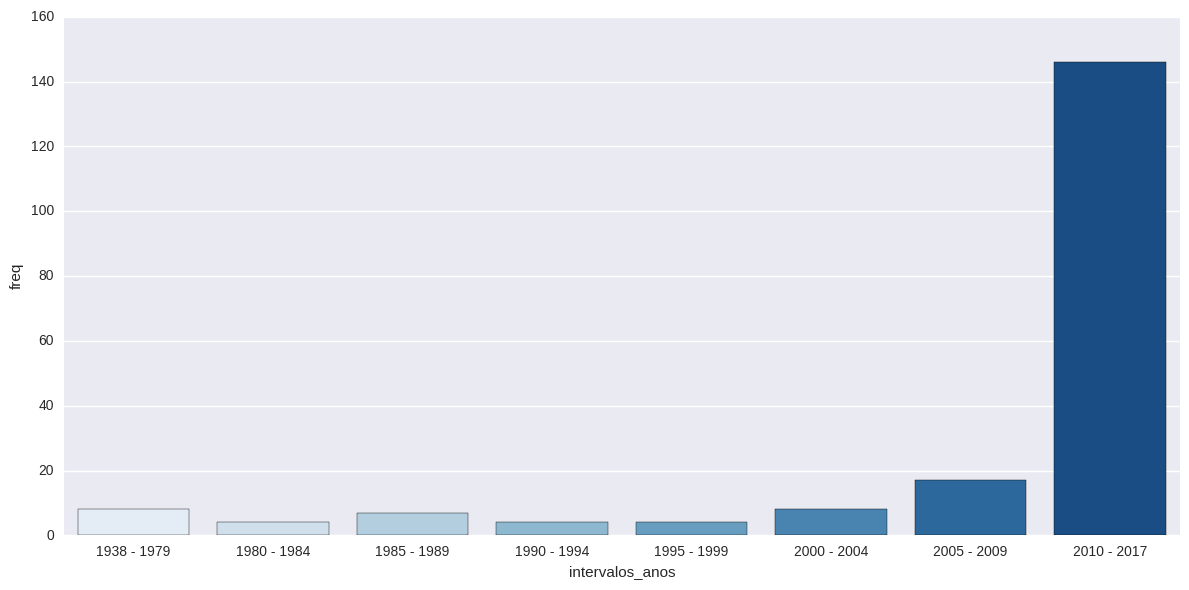

In [183]:
sns.factorplot('intervalos_anos', 'freq', data=df, kind="bar",palette="Blues",size=6,aspect=2,legend_out=False);

### Principais países

In [184]:
paises = [filme['pais'] for filme in lista_filmes]

In [185]:
unique_data = [list(x) for x in set(tuple(filme['pais']) for filme in lista_filmes if filme['pais']!=None)]

In [186]:
unique_data

[['France'],
 ['New Zealand'],
 ['Canada'],
 ['UK'],
 ['USA', 'UK'],
 ['USA', 'China'],
 ['Australia'],
 ['Canada', 'USA'],
 ['Chile', 'France'],
 ['USA', 'Canada'],
 ['UK', 'Germany'],
 ['USA', 'Germany'],
 ['Finland'],
 ['USA'],
 ['UK', 'USA'],
 ['USA', 'France'],
 ['Ireland', 'Canada'],
 ['Germany', 'USA']]

In [187]:
dic = {}
for item in unique_data:
    pais = ' & '.join(item)
    dic[pais] = 0
    for filme in lista_filmes:
        if filme['pais'] == item:
            dic[pais] += 1

In [188]:
dic

{'Australia': 1,
 'Canada': 28,
 'Canada & USA': 15,
 'Chile & France': 1,
 'Finland': 1,
 'France': 1,
 'Germany & USA': 1,
 'Ireland & Canada': 1,
 'New Zealand': 2,
 'UK': 4,
 'UK & Germany': 1,
 'UK & USA': 3,
 'USA': 121,
 'USA & Canada': 12,
 'USA & China': 1,
 'USA & France': 1,
 'USA & Germany': 1,
 'USA & UK': 1}

In [189]:
df = pd.DataFrame()
df['paises'] = dic.keys()
df['freq'] = dic.values()
df

,paises,freq
0,Canada,28
1,USA & UK,1
2,Australia,1
3,USA,121
4,USA & Germany,1
5,Germany & USA,1
6,Finland,1
7,France,1
8,Chile & France,1
9,UK & Germany,1


In [190]:
df = df[df['freq'] >= 10]

In [191]:
df

,paises,freq
0,Canada,28
3,USA,121
12,Canada & USA,15
14,USA & Canada,12


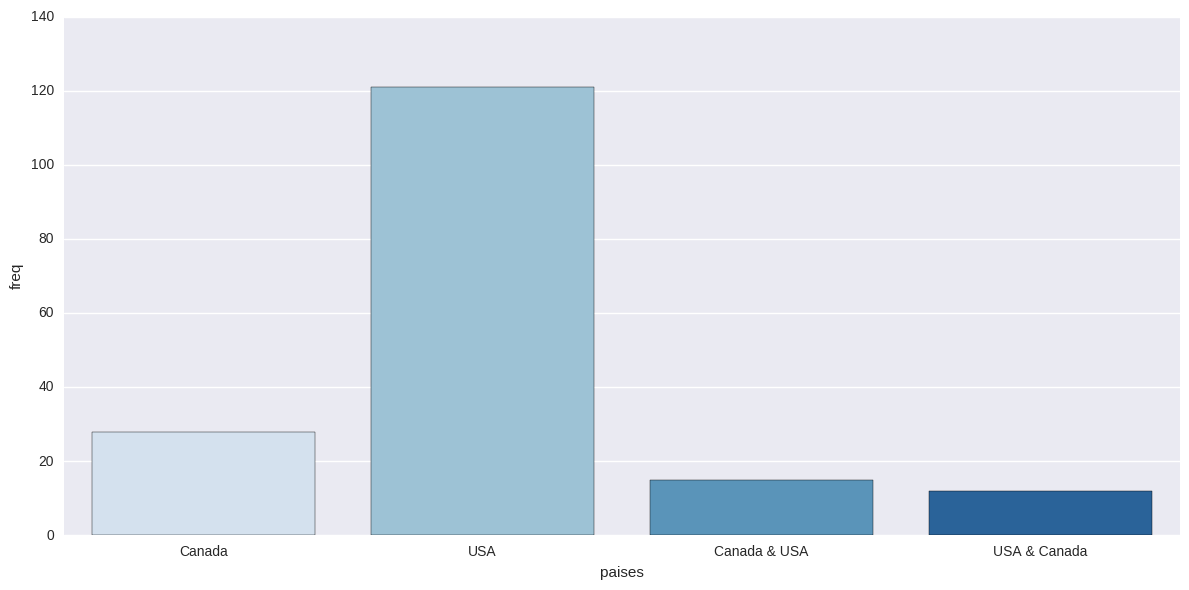

In [192]:
sns.factorplot('paises', 'freq', data=df, kind="bar",palette="Blues",size=6,aspect=2,legend_out=False);

### Media, Variância e Distribuição dos scores e durações dos filmes

In [193]:
from scipy import stats

In [194]:
scores = [filme['score'] for filme in lista_filmes if filme['score'] != None]

In [195]:
len(scores)

194

In [196]:
# medidas resumo
stats.describe(scores) 

DescribeResult(nobs=194, minmax=(1.5, 8.8000000000000007), mean=6.3345360824742274, variance=0.76869745205918494, skewness=-0.8712936093396618, kurtosis=4.62485479456394)

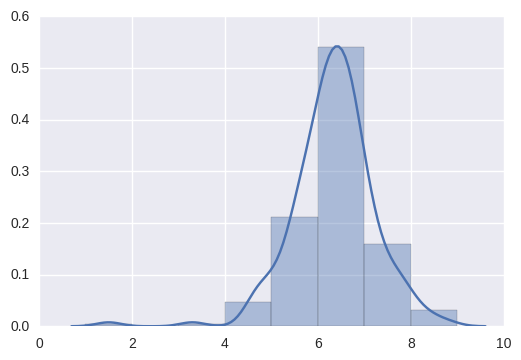

In [197]:
# distribuição
sns.distplot(scores, bins=range(0, 10, 1));

In [198]:
duracao = [filme['duracao'] for filme in lista_filmes if filme['duracao'] != None]

In [199]:
len(duracao)

172

In [200]:
# medidas resumo
stats.describe(duracao)

DescribeResult(nobs=172, minmax=(25, 150), mean=90.488372093023258, variance=279.8419692642459, skewness=-0.9755307407849242, kurtosis=5.523599441915891)

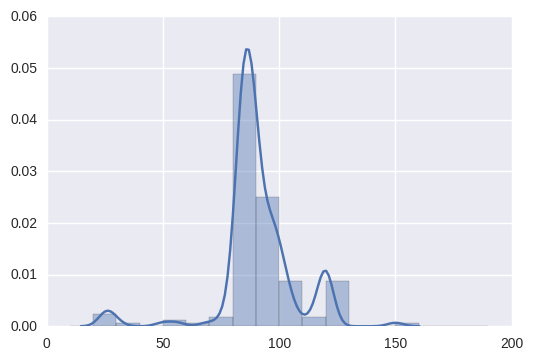

In [201]:
# variável duracao é uma lista de valores
sns.distplot(duracao, bins=range(0, 200, 10));

### Filmes com maiores rates

Vamos obter os 5 filmes com maiores rates

In [202]:
# vamos criar uma lista de tuplas (título, score)

titulo = [filme['titulo'] for filme in lista_filmes
                                    if filme['score'] != None ]

In [204]:
titulo_score = zip(titulo, scores)

In [205]:
from operator import itemgetter

titulo_score.sort(key=lambda tup: tup[1], reverse=True)

In [206]:
df_titulo_score = pd.DataFrame(titulo_score, columns=['filme', 'score'])

In [207]:
df_titulo_score.head()

,filme,score
0,Christmas,8.8
1,O Natal do Charlie Brown,8.4
2,Como o Grinch roubou o Natal,8.4
3,Contos de Natal,8.1
4,Uma Hist\u00f3ria de Natal,8.0


### Filmes com mais reviews

In [208]:
titulo_reviews = [(filme['titulo'], filme['qtd_reviews']) for filme in lista_filmes
                                                         if filme['qtd_reviews'] != None]

In [209]:
titulo_reviews.sort(key=lambda tup: tup[1], reverse=True)

In [210]:
df_titulo_reviews = pd.DataFrame(titulo_reviews, columns=['filme', 'qtd_reviews'])
df_titulo_reviews.head()

,filme,qtd_reviews
0,O Grinch,490
1,Uma Hist\u00f3ria de Natal,470
2,O Estranho Mundo de Jack,452
3,Noite do Terror,353
4,Natal Negro,285


In [211]:
# Noite do Terror http://www.imdb.com/title/tt0071222/?ref_=fn_tt_tt_76

### Principais gêneros

In [5]:
generos= []
for filme in lista_filmes:
    if filme['genero'] != None:
        for genero in filme['genero']:
            generos.append(genero)

In [6]:
generos = set(generos) 

In [7]:
generos

{' Action',
 ' Adventure',
 ' Animation',
 ' Biography',
 ' Comedy',
 ' Crime',
 ' Drama',
 ' Family',
 ' Fantasy',
 ' Horror',
 ' Music',
 ' Musical',
 ' Mystery',
 ' Romance',
 ' Short',
 ' Thriller'}

In [8]:
dic = {}
for genero in generos:
    n = 0
    for filme in lista_filmes:
        if filme['genero'] != None and genero in filme['genero']:
            n += 1
        dic[genero] = n

In [9]:
dic

{' Action': 1,
 ' Adventure': 3,
 ' Animation': 7,
 ' Biography': 1,
 ' Comedy': 91,
 ' Crime': 2,
 ' Drama': 94,
 ' Family': 73,
 ' Fantasy': 30,
 ' Horror': 6,
 ' Music': 4,
 ' Musical': 7,
 ' Mystery': 3,
 ' Romance': 94,
 ' Short': 4,
 ' Thriller': 4}

In [16]:
import operator

sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))

In [17]:
sorted_dic

[(' Action', 1),
 (' Biography', 1),
 (' Crime', 2),
 (' Mystery', 3),
 (' Adventure', 3),
 (' Short', 4),
 (' Music', 4),
 (' Thriller', 4),
 (' Horror', 6),
 (' Animation', 7),
 (' Musical', 7),
 (' Fantasy', 30),
 (' Family', 73),
 (' Comedy', 91),
 (' Drama', 94),
 (' Romance', 94)]

In [49]:
colors

['rosybrown',
 'firebrick',
 'deepskyblue',
 'forestgreen',
 'magenta',
 'fuchsia',
 'steelblue',
 'mediumspringgreen',
 'oldlace',
 'darkorchid',
 'grey',
 'gold',
 'olivedrab',
 'orange',
 'r',
 'yellow']

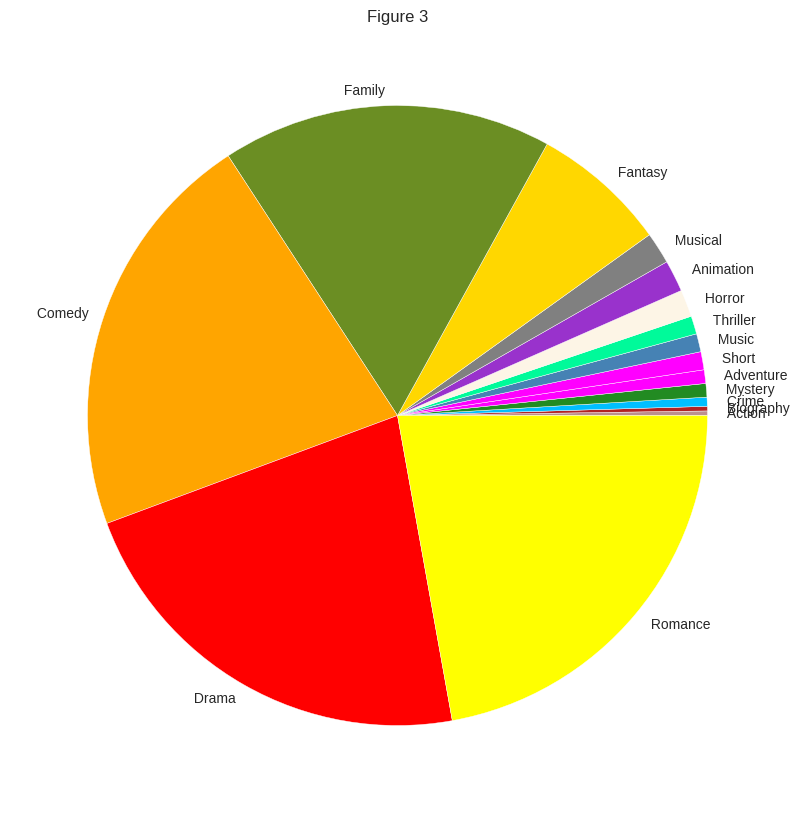

In [55]:
# slices = dic.values()
# labels = dic.keys()

slices = [tupla[1] for tupla in sorted_dic]
labels = [tupla[0] for tupla in sorted_dic]

colors = ['rosybrown', 'firebrick', 'deepskyblue', 'forestgreen', 'magenta',
 'fuchsia', 'steelblue', 'mediumspringgreen', 'oldlace', 'darkorchid', 'grey',
 'gold', 'olivedrab', 'orange', 'r','yellow']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(slices, colors=colors, labels=labels, labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Figure 3");

plt.show()

# FIM

<img src='Cognatal.png'>